In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [3]:
DATA_FILE = '../data/대구기온_1909_2025.csv'
dataDF = pd.read_csv(DATA_FILE, skiprows = 6)

dataDF.head()
dataDF.drop(columns=['지점'], inplace = True)
# dataDF['날짜'] = dataDF['날짜'].str.replace('\t', '')
dataDF['날짜'] = dataDF['날짜'].str.strip()

df = dataDF.copy()
df
df[df.isna().any(axis=1)]

,날짜,평균기온(℃),최저기온(℃),최고기온(℃),Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,1910-01-01,0.8,-2.6,7.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1910-01-02,-1.8,-5.1,-0.1,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1910-01-03,1.8,-3.5,7.8,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1910-01-04,5.0,-2.7,12.5,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1910-01-05,5.8,-0.3,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42313,2025-11-06,12.8,6.7,21.2,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42314,2025-11-07,13.1,7.7,20.6,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42315,2025-11-08,12.9,7.8,18.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
42316,2025-11-09,14.6,11.1,19.3,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
# ## 데이터의 특성 즉, 기온 무작위성 X => 같은 컬럼의 값들이 서로 연결성
# ## 삭제하지 않고 채우기 => 이전/이후값들의 평균값으로 채우기
# for idx in df.index :
#     ## 결측치 존재 컬럼명 추출
#     cols = df.iloc[idx][df.iloc[idx].isna()].index

#     ## 결측치 존재 행의 앞/뒤 3개행 선택 => 평균 : {컬럼명:평균값,...}
#     fill_values = df[cols].iloc[idx-1:idx+2].mean(numeric_only= True).to_dict()
#     df.loc[idx]= df.iloc[idx].fillna(fill_values)

# ## 결측치 대체 확인
# df.isna().sum()

# ## 타입변경
# df.날짜 = df['날짜'].astype(dtype='datetime64[ns]')
# df.dtypes

[1] 대구 지역 기온변화<hr>

In [5]:
# # [1] 지구 온난화 진짜인가
# df1 = df.drop(columns = ['최저기온(℃)','최고기온(℃)'])
# df1['년'] = df1['날짜'].dt.year
# df1['더운날'] = df1['평균기온(℃)'] >= 25
# Hotdays = df1.groupby('년')['더운날'].sum()
# Hotdays
# display(Hotdays)

# Hotdays.plot(figsize=(14,6),marker = 'o')
# plt.title('1910~2025년 대구 여름일수 변화 (일 평균기온 25℃ 이상)')
# plt.xlabel('년도')
# plt.ylabel('여름일수(일)')
# plt.legend()
# plt.tight_layout()
# plt.show()



[2] 대구 지역의 인구, 구별로<hr>

In [6]:
# [1] 성별 인구 비율
DATA_FILE = '../data/202510_202510_연령별인구현황_월간.csv'
dataDF = pd.read_csv(DATA_FILE)
dataDF.isna().sum()
df = dataDF.copy()
df = df.drop(df.index[0], axis=0)
df["행정구역"] = df["행정구역"].str.replace("[^가-힣]", "",regex=True)
df1 = df[['행정구역','2025년10월_남_총인구수',"2025년10월_여_총인구수"]]
df1 = df1.set_index('행정구역')
df1['2025년10월_남_총인구수'] = df1['2025년10월_남_총인구수'].str.replace(',', '').astype(float)
df1['2025년10월_여_총인구수'] = df1['2025년10월_여_총인구수'].str.replace(',', '').astype(float)
df1.dtypes


2025년10월_남_총인구수    float64
2025년10월_여_총인구수    float64
dtype: object

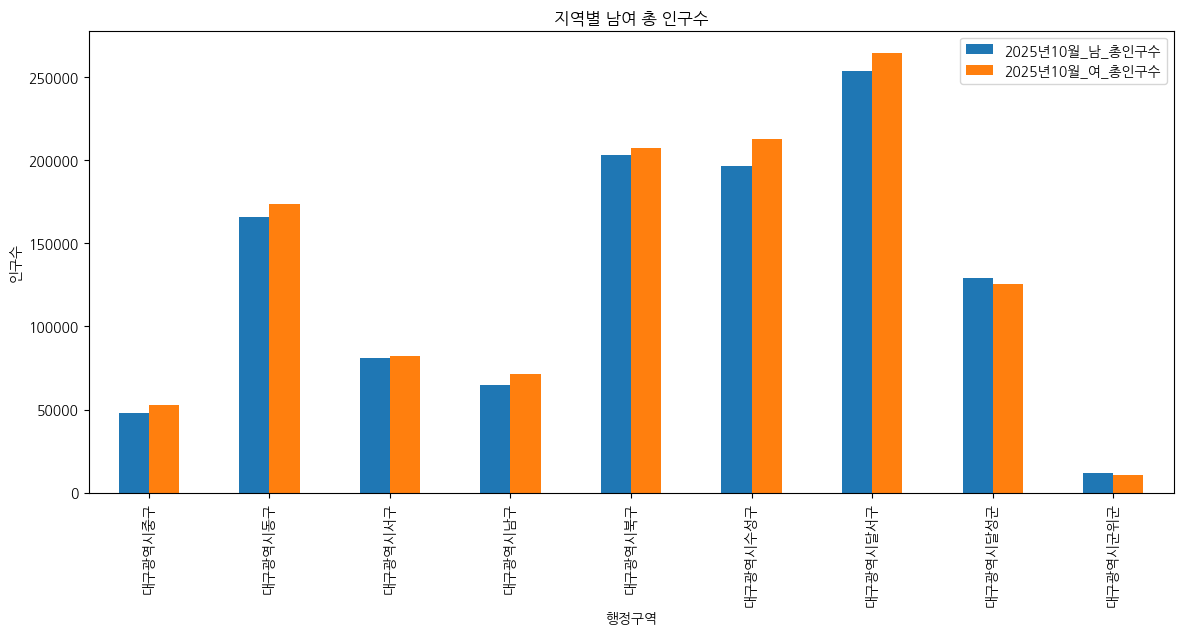

In [7]:
df1.plot(kind='bar', figsize=(14,6))
plt.ylabel('인구수')
plt.title('지역별 남여 총 인구수')
plt.show()

In [8]:
# (2) 투표 가능 인구

df.columns = df.columns.str.replace('2025년10월_', '', regex=True)

df1 = df.T


df1

,1,2,3,4,5,6,7,8,9
행정구역,대구광역시중구,대구광역시동구,대구광역시서구,대구광역시남구,대구광역시북구,대구광역시수성구,대구광역시달서구,대구광역시달성군,대구광역시군위군
남_총인구수,"48,213","165,906","80,903","64,561","203,316","196,740","253,743","129,166","11,612"
남_연령구간인구수,"47,726","165,010","80,575","64,332","202,406","195,999","252,594","128,436","11,588"
남_1세,435,864,327,248,877,687,"1,090",786,20
남_2세,406,805,306,229,833,792,"1,047",763,18
...,...,...,...,...,...,...,...,...,...
여_96세,17,87,33,63,75,98,93,43,16
여_97세,22,58,35,36,58,60,62,32,4
여_98세,14,39,24,20,42,47,38,19,11
여_99세,2,16,8,13,23,36,20,12,3


C:\Users\lsj03\AppData\Local\Temp\ipykernel_25612\3313638231.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_m['투표가능_남'] = vote_m.sum(axis=1)
C:\Users\lsj03\AppData\Local\Temp\ipykernel_25612\3313638231.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  vote_f['투표가능_여'] = vote_f.sum(axis=1)


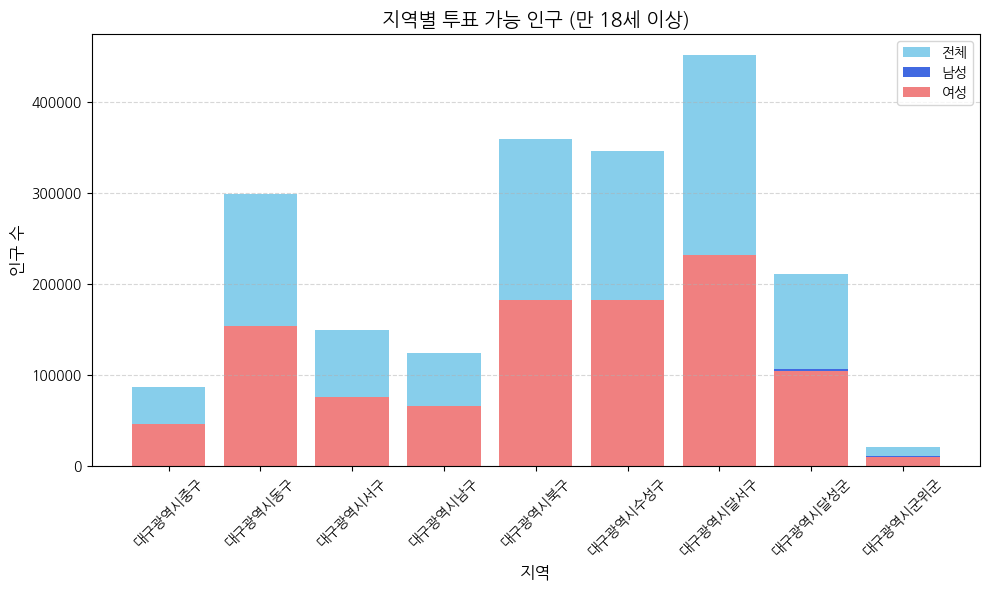

In [14]:

df_m = df.filter(like='남_')
df_m = df_m.drop(df_m.columns[0:2], axis=1)
df_m = df_m.replace(',', '', regex=True).astype(int)

age_nums = df_m.columns.str.extract('(\d+)')[0].astype(float)
age_nums.index = df_m.columns 
vote_m = df_m.loc[:, age_nums >= 18]

vote_m['투표가능_남'] = vote_m.sum(axis=1)

df_f = df.filter(like='여_')
df_f = df_f.drop(df_f.columns[0:2], axis=1)
df_f = df_f.replace(',', '', regex=True).astype(int)

age_nums_f = df_f.columns.str.extract('(\d+)')[0].astype(float)
age_nums_f.index = df_f.columns
vote_f = df_f.loc[:, age_nums_f >= 18]
vote_f['투표가능_여'] = vote_f.sum(axis=1)


vote_total = pd.concat([vote_m['투표가능_남'], vote_f['투표가능_여']], axis=1)
vote_total['투표가능_전체'] = vote_total.sum(axis=1)
regions = [
    '대구광역시중구', '대구광역시동구', '대구광역시서구', 
    '대구광역시남구', '대구광역시북구', '대구광역시수성구', 
    '대구광역시달서구', '대구광역시달성군', '대구광역시군위군'
]
vote_total.index = regions

plt.figure(figsize=(10,6))
plt.bar(vote_total.index, vote_total['투표가능_전체'], color='skyblue', label='전체')
plt.bar(vote_total.index, vote_total['투표가능_남'], color='royalblue', label='남성')
plt.bar(vote_total.index, vote_total['투표가능_여'], color='lightcoral', label='여성')

plt.title('지역별 투표 가능 인구 (만 18세 이상)', fontsize=14)
plt.xlabel('지역', fontsize=12)
plt.ylabel('인구 수', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(vote_total.index, rotation=45)
plt.tight_layout()
plt.show()


C:\Users\lsj03\AppData\Local\Temp\ipykernel_25612\3342052479.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_m['학령인구_남'] = school_m.sum(axis=1)
C:\Users\lsj03\AppData\Local\Temp\ipykernel_25612\3342052479.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  school_f['학령인구_여'] = school_f.sum(axis=1)


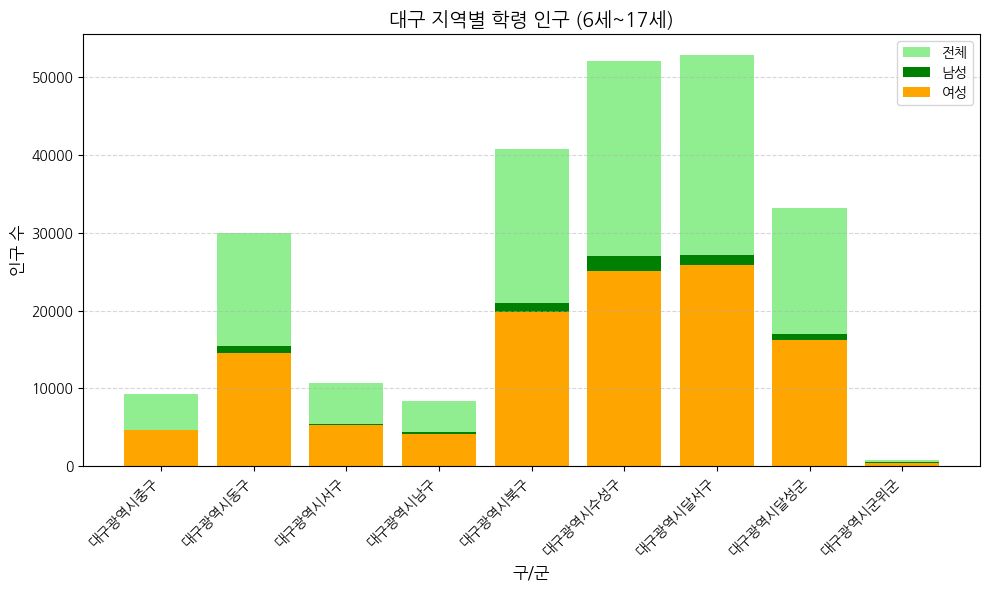

In [16]:
df_m = df.filter(like='남_')
df_m = df_m.drop(df_m.columns[0:2], axis=1)
df_m = df_m.replace(',', '', regex=True).astype(int)

age_nums = df_m.columns.str.extract('(\d+)')[0].astype(float)
age_nums.index = df_m.columns

school_m = df_m.loc[:, (age_nums >= 6) & (age_nums <= 17)]
school_m['학령인구_남'] = school_m.sum(axis=1)

df_f = df.filter(like='여_')
df_f = df_f.drop(df_f.columns[0:2], axis=1)
df_f = df_f.replace(',', '', regex=True).astype(int)

age_nums_f = df_f.columns.str.extract('(\d+)')[0].astype(float)
age_nums_f.index = df_f.columns

school_f = df_f.loc[:, (age_nums_f >= 6) & (age_nums_f <= 17)]
school_f['학령인구_여'] = school_f.sum(axis=1)

school_total = pd.concat([school_m['학령인구_남'], school_f['학령인구_여']], axis=1)
school_total['학령인구_전체'] = school_total.sum(axis=1)


regions = [
    '대구광역시중구', '대구광역시동구', '대구광역시서구',
    '대구광역시남구', '대구광역시북구', '대구광역시수성구',
    '대구광역시달서구', '대구광역시달성군', '대구광역시군위군'
]
school_total.index = regions


plt.figure(figsize=(10,6))
plt.bar(school_total.index, school_total['학령인구_전체'], color='lightgreen', label='전체')
plt.bar(school_total.index, school_total['학령인구_남'], color='green', label='남성')
plt.bar(school_total.index, school_total['학령인구_여'], color='orange', label='여성')

plt.title('대구 지역별 학령 인구 (6세~17세)', fontsize=14)
plt.xlabel('구/군', fontsize=12)
plt.ylabel('인구 수', fontsize=12)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
